<a href="https://colab.research.google.com/github/Varun0801/Deep_Learning_Essentials/blob/master/Cifar10_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1


In [ ]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
print(input_shape)
print(input_train.shape)
print(target_train.shape)
print(input_test.shape)
print(target_test.shape)

170500096/170498071 [==============================] - 16s 0us/step
(32, 32, 3)
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 1.5822 - accuracy: 0.4111 - val_loss: 1.2878 - val_accuracy: 0.5303
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 1.2044 - accuracy: 0.5668 - val_loss: 1.1311 - val_accuracy: 0.6052
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 1.0288 - accuracy: 0.6355 - val_loss: 1.0870 - val_accuracy: 0.6196
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.9095 - accuracy: 0.6782 - val_loss: 0.9876 - val_accuracy: 0.6570
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.8089 - accuracy: 0.7128 - val_loss: 0.9215 - val_accuracy: 0.6789
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.7288 - accuracy: 0.7409 - val_loss: 0.9114 - val_accuracy: 0.6949
Epoch 7/100
800/800 [==============================] - 3s 3ms/step - loss: 0.6529 - accuracy: 0.7686 - val_loss: 0.8776 - val_accuracy: 0.7025

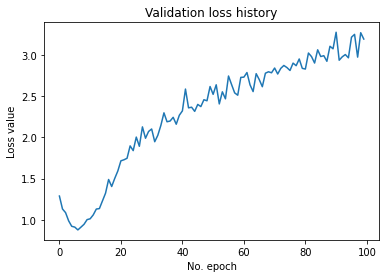

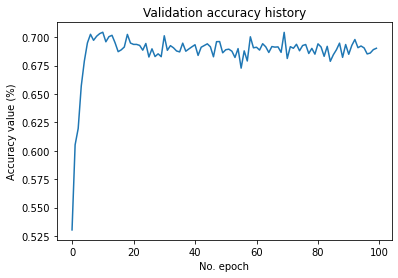

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()